In [1]:
import os
import folium

import pandas as pd
import scipy.stats as stats

from scipy.stats import gaussian_kde

from utils.plotting import plot_histogram_kde

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [2]:
DATA_PATH = "../data"
CAR_FILES = DATA_PATH + "/polo"

In [3]:
datasets = {}

for obd_type in os.listdir(CAR_FILES):
    datasets[obd_type] = {}

    for csv_file in os.listdir(CAR_FILES + "/" + obd_type):
        if "debug" in csv_file:
            datasets[obd_type]["debug"] = pd.read_csv(CAR_FILES + "/" + obd_type + "/" + csv_file)
        else:
            datasets[obd_type]["data"] = pd.read_csv(CAR_FILES + "/" + obd_type + "/" + csv_file)

# Data Analysis

In [4]:
algorithmns_columns = [col for col in datasets["A"]["data"].columns if "(microseconds)" in col]

algorithmns_columns

['FuelModelPredictionTime(microseconds)',
 'TedaModelPredictionTime(microseconds)',
 'DriveBehaviourModelPredictionTime(microseconds)',
 'CityRoadModelPredictionTime(microseconds)']

## Algorithms Analysis

In [51]:
appended_data = pd.concat(
    [
        datasets["A"]["data"][algorithmns_columns],
        datasets["B"]["data"][algorithmns_columns]
    ],
    axis=0,
    ignore_index=True
)

appended_data

,FuelModelPredictionTime(microseconds),TedaModelPredictionTime(microseconds),DriveBehaviourModelPredictionTime(microseconds),CityRoadModelPredictionTime(microseconds)
0,0,1,319,189
1,0,2,253,162
2,24878,1,253,119
3,219,2,253,189
4,225,2,560,200
...,...,...,...,...
1196,239,2,181,199
1197,255,1,181,232
1198,91,1,181,77
1199,140,1,185,96


### FuelModelPredictionTime

Foi plotado até 2000 milissegundos para melhor visualização. Somente dois valores estão acima de 2000.

In [66]:
(appended_data["FuelModelPredictionTime(microseconds)"] > 2000).sum()

np.int64(2)

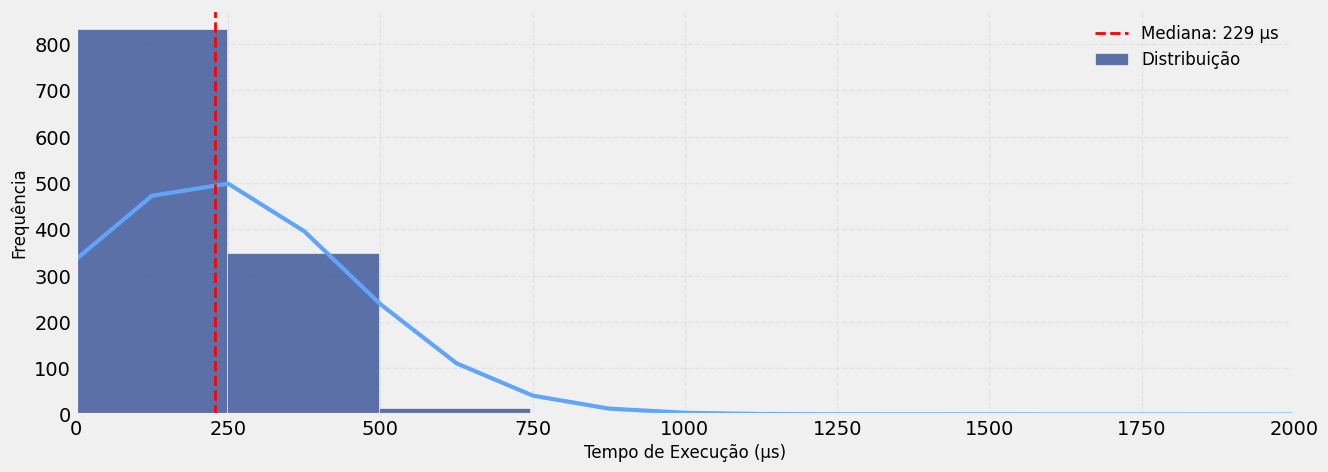

In [67]:
plot_histogram_kde(
    data=appended_data,
    variable="FuelModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 2000)
)

### TedaModelPredictionTime

Foi plotado até 50 milissegundos para melhor visualização. Somente dois valores estão acima de 50.

In [72]:
(appended_data["TedaModelPredictionTime(microseconds)"] > 50).sum()

np.int64(2)

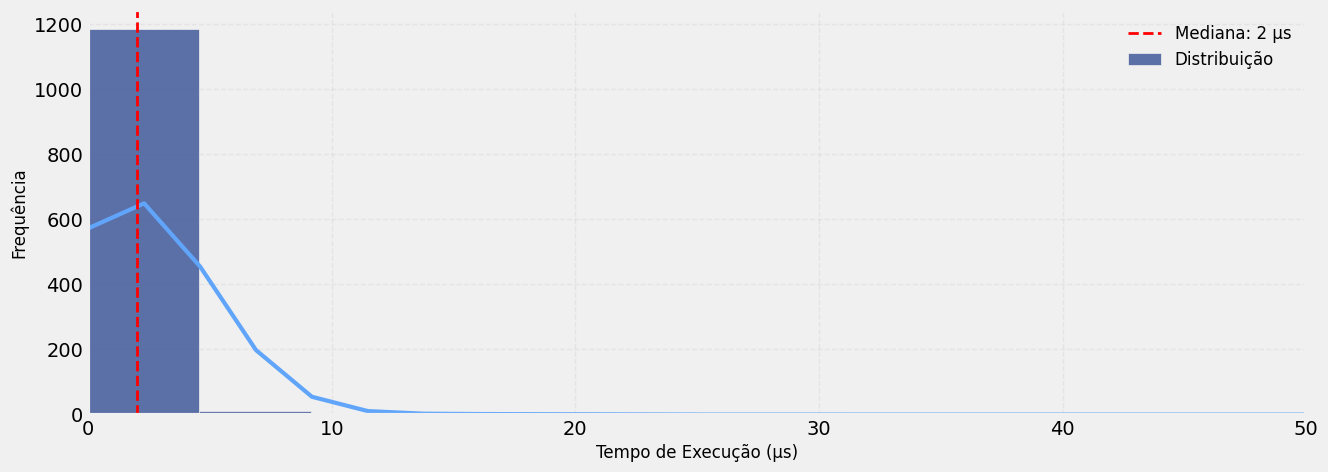

In [71]:
plot_histogram_kde(
    data=appended_data,
    variable="TedaModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 50)
)

### DriveBehaviourModelPredictionTime

Foi plotado até 1000 milissegundos para melhor visualização. Somente um valor está acima de 1000.

In [74]:
(appended_data["DriveBehaviourModelPredictionTime(microseconds)"] > 1000).sum()

np.int64(1)

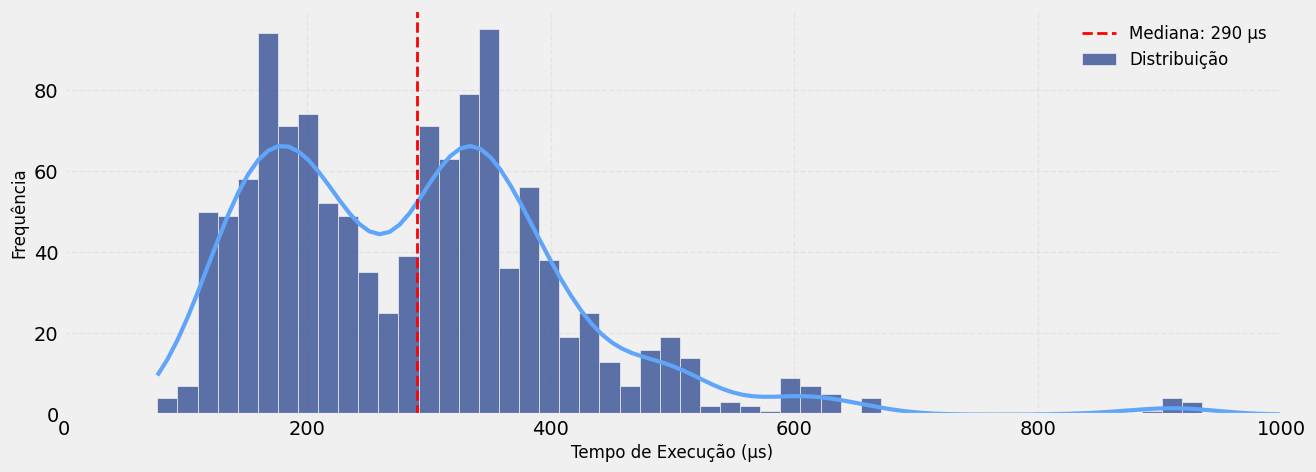

In [76]:
plot_histogram_kde(
    data=appended_data,
    variable="DriveBehaviourModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 1000)
)

### CityRoadModelPredictionTime

Foi plotado até 600 milissegundos para melhor visualização. Somente um valor está acima de 600.

In [81]:
(datasets["A"]["data"][algorithmns_columns]["CityRoadModelPredictionTime(microseconds)"] > 600).sum()

np.int64(1)

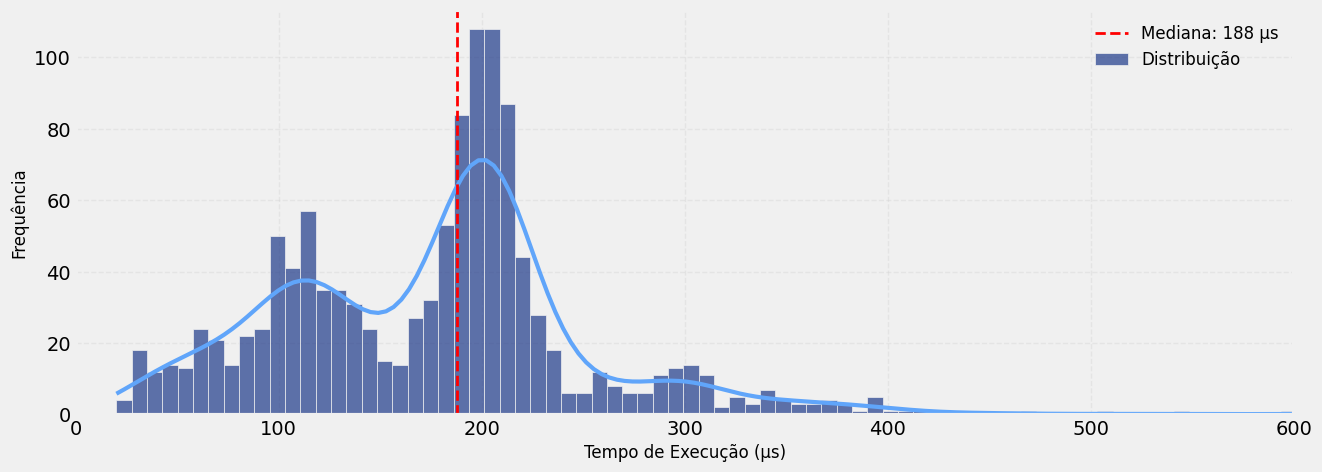

In [82]:
plot_histogram_kde(
    data=appended_data,
    variable="CityRoadModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 600)
)

# Debug Analysis